# Tents and Trees (Carpas y Árboles)

El siguiente es un problema de un pequeño juego o puzzle lógico que va por el nombre de <i>Tents and Trees</i>, es un juego que presenta muchas variaciones y es díficil atribuir su invención realmente a un solo autor. A pesar de las variaciones, el juego generalmente sigue la siguiente estructura:

Se tiene una tablero de casillas, algunas de las cuales contienen árboles. Como se ve a continuación:

![Initial](images/initial.png)

El objetivo de este <i>Puzzle</i> lógico es ubicar carpas al lado de los árboles de tal manera que se satisfagan unas reglas:

- Hay una relación uno a uno, entre cada árbol y su carpa correspondiente.
- Cada carpa debe ser adyacente a su propio árbol, (puede ser horizontalmente ó verticalmente, pero no diagonalmente). Adicionalmente, una carpa puede ser adyacentes a varios árboles, además del propio.
- No hay dos carpas adyacentes, nisiquiera diagonalmente.
- El número de carpas de cada fila y columna, debe corresponder con los establecidos a los lados del tablero.

La solución al puzzle visto inicialmente sería la siguiente:

![Final](images/final.png)

Aquí hay algunos puntos claves para destacar:
- Podemos ver en la primera fila de árboles, hay una carpa adyacente a dos árboles, sin embargo esto no rompe la correspondencia de un árbol con cada carpa.
- La cantidad de carpas claramente corresponde a los números de cada fila y columna.
- A pesar de no ser necesario en la mayoría de variaciones del juego. En esta, simbolizaremos los espacios que no tengan una carpa como verdes. Esto también nos ayudará más adelante.

Cabe destacar que cada uno de estos puzzles, tienen una solución única, lo cual nos permitira tener un ambiente deterministico, como veremos más adelante.



## Entorno

Ahora representaremos esto puzzle como un mundo más afin a los entornos vistos previamentes.

La manera de visualizarlo es la siguiente: tenemos un *agente*, nuestro *jugador* en sí. El cual esta en este mundo de carpas y árboles.

Dado que la solución de cada puzzle es única, consideraremos que cada casilla *ya esta dada*, sin embargo, nuestro agente o jugador no es capaz de visualizar todas las casillas.

Así, el principal sentido y percepción de nuestra *agente* es la *vista*, el cual puede ver las posiciones de las casillas reveladas.

De esta manera, el *agente*/*jugador* percibe el mundo parcialmente, en el que al comenzar, solo percibe la posición de los árboles, y mediante lógica y reglas de este mundo, lo irá descubriendo en su totalidad.

Por lo tanto, entorno sobre el cual trabajaremos cuenta con las siguientes propiedades:

- Es parcialmente observable.
- Es de agente único (nuestro jugador).
- Es determinista (tiene única solución, y no cambia).
- Es secuencial (el agente va descubriendo el mundo).
- Es estático (el agente solo descubre el mundo, no es capaz de cambiarlo).
- Es discreto (es un tablero fijo y dado).
- Es conocido (el agente es consciente de las reglas que gobiernan este puzzle).

Así la **definición formal del entorno** se hace a continuación:
* **Entorno**:  Una cuadrícula de un tamaño dado con unos números alrededor de ella, los cuales indican el número de carpas por cada fila y cada columna. Inicialmente la cuadricula empieza con una disposición dada de árboles que garantizan una única forma de ubicar las carpas.

* **Actuadores**: El agente puede ubicar las carpas en cualquier casilla que no sea árbol o que no haya sido rellenada de color verde (El agente descubre que la posición de las carpas).

* **Sensores**: El agente puede percibir la disposición de todos los elementos dentro de la cuadricula que hayan sido "reveladas", así como los números alrededor de ella.

* **Medida de desempeño**: A pesar de que no contamos con una medida de desempeño exacta, entre más carpas sean ubicadas correctamente (entre más carpas pueda determinar la ubicación el agente), mejor será el desempeño del agente. El juego termina cuando el agente ha ubicado todas las posibles carpas. 


## Implementación del Entorno

Se realizó una implementación del puzzle en Python.
Esta nos permite jugar el juego ubicando carpas y marcando casillas verdes en el tablero, así como formas de visualizar el estado actual del tablero.

Adicionalmente, *NO* se implemento la generación de puzzles. Para esto se tomaron los puzzles generados de la siguiente página: [https://www.chiark.greenend.org.uk/~sgtatham/puzzles/js/tents.html](https://www.chiark.greenend.org.uk/~sgtatham/puzzles/js/tents.html), los créditos para la generación del puzzle se le atribuye a los respectivos.

Sin embargo, se implemento un código para descargar estos puzzles como imagenes, parsearlos y obtenerlos en un formato entendible para manejarlos y asimismo almacenarlos.
Para ver más detalles sobre esto, ver la interfaz de `TentsAndTreesPuzzleInterface` en la carpeta adjunta. Asímismo, también tenemos ya unos puzzles descargados en la carpeta de `/Puzzles`

### Uso del Entorno

Importamos las librerías necesarias:

In [1]:
from TentsAndTreesPuzzleInterface.PuzzleStorage import LoadStoredPuzzle,StorePuzzle
from TentsAndTreesPuzzleInterface.imagereader import FetchAndParsePuzzle
from TentsAndTrees import TentsAndTrees, Player

# ## Descomentar para descargar puzzles de la página y almacenarlos localmente, requiere de Selenium y CV2. Abre una ventana de chrome
# matrix,row,col = FetchAndParsePuzzle("Puzzles/samplePuzzle.png")
# StorePuzzle("Puzzles/samplePuzzle.npz",matrix,row,col)

Nos permite cargar puzzles almacenados, y así inicializar un nuevo puzzle.

In [2]:
matrix, row, col = LoadStoredPuzzle("Puzzles/puzzle3.npz")
puzzle = TentsAndTrees(matrix,row,col)

Cada casilla sigue la siguiente codificación:

| Casilla | Número de codificación |
| :---: | :---: |
| Vacia     | 0    |
| Árbol    | 1 |
| Carpa  | 2 |
| Verde (Vacía)     | 3 |

De esta manera, podemos ver el estado del puzzle:

In [3]:
print(puzzle.state)

[[1 0 0 0 1 0]
 [0 0 1 0 0 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]]


O de una manera más visual:

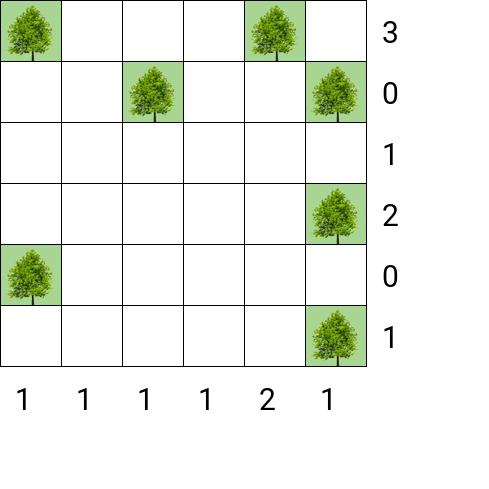

In [4]:
puzzle.displayState()

Es posible hacer movimientos con el método de `transition`. Se le específica la coordenada y el valor a colocar:

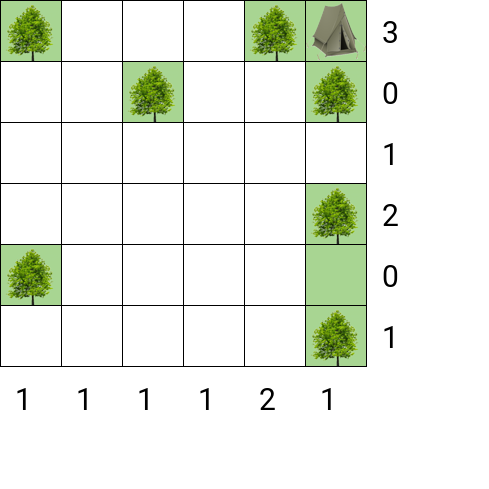

In [5]:
puzzle.transition((4,5,3))
puzzle.transition((0,5,2))

puzzle.displayState()

## Representación de *Tents and Trees* en lógica proposicional

Ahora, diseñaremos un agente capaz de solucionar en lo mejor posible el puzzle planteado. Para esto haremos uso de lógica proposicional.

- El agente tendrá las reglas del mundo y las usará para descubrir las posiciones de las carpas, asimismo como de las casillas verdes.
- El agente usará su información sensorial de vista para determinar lo mencionado.

**Átomos:**

Para comenzar, noté que la información del problema se puede dividir en dos categorías:

1. *La ubicacion de casillas/objetos en el tablero*
2. *Los números de carpas de cada fila/columna, adyacentes al tablero*

Así, definimos la codificación la información de la siguiente manera, para la información de tipo 1.

* `P(x, y, 1)` es verdadero sii el agente cree que en la casilla $(x,y)$ hay un árbol.
* `P(x, y, 2)` es verdadero sii el agente cree que en la casilla $(x,y)$ hay una carpa.
* `P(x, y, 3)` es verdadero sii el agente cree que en la casilla $(x,y)$ es vacía verde (No hay una carpa ni un árbol, es certero de que no hay en esa posición).

Cabe aclarar que cada una de estos átomos son excluyentes. Solo uno puede ser verdadero para cada casilla.

Para la información de tipo 2, se usa un descriptor adicional, y se define la codificación de la siguiente manera:

* `Pnum(0, i, n)` es verdadero sii el agente cree que hay $n$ carpas en la $i$-ésima fila.
* `Pnum(1, i, n)` es verdadero sii el agente cree que hay $n$ carpas en la $i$-ésima columna.

De esta manera, nuestro es posible codificar, y decodificar la información a nuestro agente como se ve a continuación:

In [6]:
player = Player(puzzle)
p = player.cods.P([0,5,2])
q = player.numberCods.P([1,3,2])

print(f"{p} se decodifica en: {player.humanReadAtom(p)}")
print(f"{q} se decodifica en: {player.humanReadAtom(q)}")

Ŧ se decodifica en: Tent on (0,5)
ȓ se decodifica en: 2 on Column 3


Ahora es necesario codificar la percepción de nuestro agente, mediante formulas, para esto definimos la siguiente función:

In [7]:
def make_sight_sentence(self):
        '''Creates propositional sentence out of perceived sight.'''
        # agent can see the board.
        sentences = []
        for i in range(self.puzzle.m):
            for j in range(self.puzzle.n):
                if self.puzzle.state[i, j] != 0:
                    prop = self.cods.P([i, j, self.puzzle.state[i, j]])
                    sentences.append(prop)
                else:  # If empty, agent can see that there's no tree.
                    prop = '-' + self.cods.P([i, j, 1])
                    sentences.append(prop)
        # agent can see the adjacent board numbers.
        # add row numbers
        for i in range(self.puzzle.m):
            sentences.append(self.numberCods.P([0, i, self.puzzle.row[i]]))
        # add col numbers
        for i in range(self.puzzle.n):
            sentences.append(self.numberCods.P([1, i, self.puzzle.col[i]]))
        return 'Y'.join(sentences)

Esta nos permite obtener de manera códificada la información que percibe el agente mediante la visión.
En la cual el agente percibe las casillas dadas, y en las casillas "vacías" solo percibe que no hay un árbol.
Adicionalmente, el agente percibe los números adyacentes al tablero, con la codificación propuesta previamente.

Este método ya se encuentra incluido en nuestra implementación del agente `Player`.

## Representación de Reglas 

Ahora representaremos el mundo mediante reglas, usando la lógica proposicional vista previamente.
Para esto, definiremos un total de 7 reglas que le permitiran a nuestro agente, solucionar el puzzle. Omitiremos la implementación de estas reglas, y veremos su significado con un método ya implementado de `humanReadFormula`

### Regla 1: Unicidad
La regla más básica, consiste en que como se menciono anteriormente, cada proposición es exclusiva para cada casilla. Es decir, si hay un árbol en (0,0), no hay una carpa en (0,0) ni verde en (0,0).

In [8]:
for rule in player.make_unique_rule()[:10]:
  print(player.humanReadFormula(rule))
print(".")
print(".")
print(".")

Tree on (0,0) => NOT Tent on (0,0)
Tree on (0,0) => NOT Green on (0,0)
Tent on (0,0) => NOT Tree on (0,0)
Tent on (0,0) => NOT Green on (0,0)
Green on (0,0) => NOT Tree on (0,0)
Green on (0,0) => NOT Tent on (0,0)
Tree on (0,1) => NOT Tent on (0,1)
Tree on (0,1) => NOT Green on (0,1)
Tent on (0,1) => NOT Tree on (0,1)
Tent on (0,1) => NOT Green on (0,1)
.
.
.


### Regla 2: Verdes Vacios no adyacentes
Esta regla consiste, en que dado que todos las carpas deben estar adyacentes a un árbol, aquellas casillas que no estan adyacentes a un árbol (y no son árboles), entonces deben ser vacías (verdes).

In [9]:
for rule in player.make_emptygreen_rule()[:10]:
  print(player.humanReadFormula(rule))
print(".")
print(".")
print(".")

NOT Tree on (1,0) AND NOT Tree on (0,1) AND NOT Tree on (0,0) => Green on (0,0)
NOT Tree on (1,1) AND NOT Tree on (0,2) AND NOT Tree on (0,0) AND NOT Tree on (0,1) => Green on (0,1)
NOT Tree on (1,2) AND NOT Tree on (0,3) AND NOT Tree on (0,1) AND NOT Tree on (0,2) => Green on (0,2)
NOT Tree on (1,3) AND NOT Tree on (0,4) AND NOT Tree on (0,2) AND NOT Tree on (0,3) => Green on (0,3)
NOT Tree on (1,4) AND NOT Tree on (0,5) AND NOT Tree on (0,3) AND NOT Tree on (0,4) => Green on (0,4)
NOT Tree on (1,5) AND NOT Tree on (0,4) AND NOT Tree on (0,5) => Green on (0,5)
NOT Tree on (2,0) AND NOT Tree on (0,0) AND NOT Tree on (1,1) AND NOT Tree on (1,0) => Green on (1,0)
NOT Tree on (2,1) AND NOT Tree on (0,1) AND NOT Tree on (1,2) AND NOT Tree on (1,0) AND NOT Tree on (1,1) => Green on (1,1)
NOT Tree on (2,2) AND NOT Tree on (0,2) AND NOT Tree on (1,3) AND NOT Tree on (1,1) AND NOT Tree on (1,2) => Green on (1,2)
NOT Tree on (2,3) AND NOT Tree on (0,3) AND NOT Tree on (1,4) AND NOT Tree on (1,2

<td> <img src="./images/initial.png" alt="Drawing" style="width: 500px;"/></td>
<td> ----------> </td>
<td> <img src="./images/postgreenrule.png" alt="Drawing" style="width: 500px;"/></td>

### Regla 3: Verdes Vacios no adyacentes
Esta regla consiste, en que dado un 0 en el número de una fila o columna, dado que no hay carpas, se sabe que solo hay casillas verdes vacían en donde no hay árboles.

In [10]:
for rule in player.make_emptyrowcol_rule()[:10]:
  print(player.humanReadFormula(rule))
print(".")
print(".")
print(".")

NOT Tree on (0,0) AND 0 on Row 0 => Green on (0,0)
NOT Tree on (0,0) AND 0 on Column 0 => Green on (0,0)
NOT Tree on (0,1) AND 0 on Row 0 => Green on (0,1)
NOT Tree on (0,1) AND 0 on Column 1 => Green on (0,1)
NOT Tree on (0,2) AND 0 on Row 0 => Green on (0,2)
NOT Tree on (0,2) AND 0 on Column 2 => Green on (0,2)
NOT Tree on (0,3) AND 0 on Row 0 => Green on (0,3)
NOT Tree on (0,3) AND 0 on Column 3 => Green on (0,3)
NOT Tree on (0,4) AND 0 on Row 0 => Green on (0,4)
NOT Tree on (0,4) AND 0 on Column 4 => Green on (0,4)
.
.
.


<td> <img src="./images/postgreenrule.png" alt="Drawing" style="width: 500px;"/></td>
<td> ----------> </td>
<td> <img src="./images/postemptyrowcolrule.png" alt="Drawing" style="width: 500px;"/></td>

### Regla 4: Carpa en único vacio adyacente
Dado que todo árbol debe llevar almenos un árbol, si todas las casillas adyacentes a un árbol NO tienen carpas, excepto una está libre, se puede deducir que ahí debe ir una carpa.


In [11]:
for rule in player.make_only_adjacent_tent_rule()[:10]:
  print(player.humanReadFormula(rule))
print(".")
print(".")
print(".")

Tree on (0,0) AND NOT Tree on (1,0) AND NOT Tent on (0,1) => Tent on (1,0)
Tree on (0,0) AND NOT Tree on (0,1) AND NOT Tent on (1,0) => Tent on (0,1)
Tree on (0,1) AND NOT Tree on (1,1) AND NOT Tent on (0,2) AND NOT Tent on (0,0) => Tent on (1,1)
Tree on (0,1) AND NOT Tree on (0,2) AND NOT Tent on (1,1) AND NOT Tent on (0,0) => Tent on (0,2)
Tree on (0,1) AND NOT Tree on (0,0) AND NOT Tent on (1,1) AND NOT Tent on (0,2) => Tent on (0,0)
Tree on (0,2) AND NOT Tree on (1,2) AND NOT Tent on (0,3) AND NOT Tent on (0,1) => Tent on (1,2)
Tree on (0,2) AND NOT Tree on (0,3) AND NOT Tent on (1,2) AND NOT Tent on (0,1) => Tent on (0,3)
Tree on (0,2) AND NOT Tree on (0,1) AND NOT Tent on (1,2) AND NOT Tent on (0,3) => Tent on (0,1)
Tree on (0,3) AND NOT Tree on (1,3) AND NOT Tent on (0,4) AND NOT Tent on (0,2) => Tent on (1,3)
Tree on (0,3) AND NOT Tree on (0,4) AND NOT Tent on (1,3) AND NOT Tent on (0,2) => Tent on (0,4)
.
.
.


<td> <img src="./images/postemptyrowcolrule.png" alt="Drawing" style="width: 500px;"/></td>
<td> ----------> </td>
<td> <img src="./images/postadjacenttentrule.png" alt="Drawing" style="width: 500px;"/></td>

### Regla 5: Verde vacío a adyacentes a carpas.
Dado que no hay 2 carpas adyacentes. Todas las casillas que no son árboles adyacentes a una carpa deberan ser verdes (vacías).


In [12]:
for rule in player.make_emptygreen_adjacent_to_tent_rule()[:10]:
  print(player.humanReadFormula(rule))
print(".")
print(".")
print(".")

Tent on (0,0) AND NOT Tree on (1,0) => Green on (1,0)
Tent on (0,0) AND NOT Tree on (0,1) => Green on (0,1)
Tent on (0,0) AND NOT Tree on (1,1) => Green on (1,1)
Tent on (0,1) AND NOT Tree on (1,1) => Green on (1,1)
Tent on (0,1) AND NOT Tree on (0,2) => Green on (0,2)
Tent on (0,1) AND NOT Tree on (0,0) => Green on (0,0)
Tent on (0,1) AND NOT Tree on (1,0) => Green on (1,0)
Tent on (0,1) AND NOT Tree on (1,2) => Green on (1,2)
Tent on (0,2) AND NOT Tree on (1,2) => Green on (1,2)
Tent on (0,2) AND NOT Tree on (0,3) => Green on (0,3)
.
.
.


<td> <img src="./images/postadjacenttentrule.png" alt="Drawing" style="width: 500px;"/></td>
<td> ----------> </td>
<td> <img src="./images/postemptygreentent.png" alt="Drawing" style="width: 500px;"/></td>

### Regla 6: Relleno de Casillas "Vacías" por número
Esta es una regla fácil de entender intuitivamente, pero un poco más díficil de representar en lógica proposicional.
Consiste en que si en alguna fila/columna quedan exactamente $n$ espacios libres (es decir, TODAS LAS DEMÁS NO SON CARPAS), y hay un número $n$ en la fila/columna, entonces todas las casillas "vacías" deberán ser carpas.


In [13]:
for rule in player.make_fill_remaining_tents_equal_rule()[:10]:
  print(player.humanReadFormula(rule))
print(".")
print(".")
print(".")

NOT Tent on (0,1) AND NOT Tent on (0,2) AND NOT Tent on (0,3) AND NOT Tent on (0,4) AND NOT Tent on (0,5) AND NOT Tree on (0,0) AND 1 on Row 0 => Tent on (0,0)
NOT Tent on (0,0) AND NOT Tent on (0,2) AND NOT Tent on (0,3) AND NOT Tent on (0,4) AND NOT Tent on (0,5) AND NOT Tree on (0,1) AND 1 on Row 0 => Tent on (0,1)
NOT Tent on (0,0) AND NOT Tent on (0,1) AND NOT Tent on (0,3) AND NOT Tent on (0,4) AND NOT Tent on (0,5) AND NOT Tree on (0,2) AND 1 on Row 0 => Tent on (0,2)
NOT Tent on (0,0) AND NOT Tent on (0,1) AND NOT Tent on (0,2) AND NOT Tent on (0,4) AND NOT Tent on (0,5) AND NOT Tree on (0,3) AND 1 on Row 0 => Tent on (0,3)
NOT Tent on (0,0) AND NOT Tent on (0,1) AND NOT Tent on (0,2) AND NOT Tent on (0,3) AND NOT Tent on (0,5) AND NOT Tree on (0,4) AND 1 on Row 0 => Tent on (0,4)
NOT Tent on (0,0) AND NOT Tent on (0,1) AND NOT Tent on (0,2) AND NOT Tent on (0,3) AND NOT Tent on (0,4) AND NOT Tree on (0,5) AND 1 on Row 0 => Tent on (0,5)
NOT Tent on (1,1) AND NOT Tent on (1,2) 

<td> <img src="./images/postemptygreentent.png" alt="Drawing" style="width: 500px;"/></td>
<td> ----------> </td>
<td> <img src="./images/fillremainingtents.png" alt="Drawing" style="width: 500px;"/></td>

### Regla 7: Relleno de Casillas "Vacías" por número
Esta regla consiste en que ubicadas todas las carpas de una fila, todas las demás casillas que no sean árboles, deberan ser vacias.

In [14]:
for rule in player.make_fillgreen_filledtents_row_rule()[:10]:
  print(player.humanReadFormula(rule))
print(".")
print(".")
print(".")

Tent on (0,0) AND NOT Tree on (0,1) AND 1 on Row 0 => Green on (0,1)
Tent on (0,0) AND NOT Tree on (0,2) AND 1 on Row 0 => Green on (0,2)
Tent on (0,0) AND NOT Tree on (0,3) AND 1 on Row 0 => Green on (0,3)
Tent on (0,0) AND NOT Tree on (0,4) AND 1 on Row 0 => Green on (0,4)
Tent on (0,0) AND NOT Tree on (0,5) AND 1 on Row 0 => Green on (0,5)
Tent on (0,1) AND NOT Tree on (0,0) AND 1 on Row 0 => Green on (0,0)
Tent on (0,1) AND NOT Tree on (0,2) AND 1 on Row 0 => Green on (0,2)
Tent on (0,1) AND NOT Tree on (0,3) AND 1 on Row 0 => Green on (0,3)
Tent on (0,1) AND NOT Tree on (0,4) AND 1 on Row 0 => Green on (0,4)
Tent on (0,1) AND NOT Tree on (0,5) AND 1 on Row 0 => Green on (0,5)
.
.
.


<td> <img src="./images/fillremainingtents.png" alt="Drawing" style="width: 500px;"/></td>
<td> ----------> </td>
<td> <img src="./images/fillleftovergreen.png" alt="Drawing" style="width: 500px;"/></td>

## Inferencias

Ya con todas estas reglas definidas, es posible que el agente realice inferencias, realizando preguntas a su base de conocimientos.
Se decidio usar el algoritmo de *forward chaining* dado nos posó mayor eficiente que otras opciones. 

Con este podemos a partir de átomos percibidos por el agente mediante su visión, deducir otros desconocidos a través de reglas.

Por ejemplo:

In [15]:
from logica import LPQuery,pl_fc_ask
# se crea la base de datos.
player.knowledge = LPQuery(
    player.make_emptygreen_rule() +
    player.make_unique_rule() +
    player.make_emptyrowcol_rule() +
    player.make_only_adjacent_tent_rule() +
    player.make_emptygreen_adjacent_to_tent_rule() +
    player.make_fill_remaining_tents_equal_rule() +
    player.make_fillgreen_filledtents_row_rule()
)

player.InitializeAtoms() # Inicializa los atomos, dado se usa forward chaining es necesario este paso.
# Ya incluido con el agente
def acknowledge_sight(self):
        ''' Adds the sight propositional sentences to the Agent's knowledge database'''
        self.knowledge.TELL(self.make_sight_sentence())

player.acknowledge_sight() # El agente percibe y lo añade a su base de conocimientos
pl_fc_ask(player.cods.P([0,1,2]), player.knowledge) # El agente cree que hay una carpa en (0,1)?

True

Así ya tenemos todas las herramientas necesarias para generar un programa, que maneje a nuestro agente y le permita solucionar el puzzle.

Para esto crearemos dos funciones helper sencillas, que nos ayudaran a esto:

In [16]:
def findGreen(player):
    found = False
    for i in range(puzzle.m):
        for j in range(puzzle.n):
            if puzzle.state[i, j] == 0:  # only ask on empty squares
                if pl_fc_ask(player.cods.P([i, j, 3]), player.knowledge):
                    puzzle.transition([i, j, 3])
                    found = True
                    break
        if found:
            break
    return found

Esta función simplemente hace que el agente le pregunte por cada casilla vacia, si cree que hay un verde en ella, en caso de ser cierto, el agente descubre la casilla y la úbica en la posición indicada.

Se crea una función totalmente análoga, pero para las carpas:

In [17]:
def findTent(player):
    found = False
    for i in range(puzzle.m):
        for j in range(puzzle.n):
            if puzzle.state[i, j] == 0:  # only ask on empty squares
                if pl_fc_ask(player.cods.P([i, j, 2]), player.knowledge):
                    puzzle.transition([i, j, 2])
                    found = True
                    break
        if found:
            break
    return found

Ahora definimos un programa del agente, que intente solucionar el problema, preguntando por las casillas hasta que descubra todas, o hasta que no le sea capaz realizar más deducciones, en dicho caso se considera que el agente quedo atascado.

In [18]:
def programa(agente):
    while True:
        agente.acknowledge_sight()
        if findGreen(agente):
            continue

        if findTent(agente):
            continue

        if puzzle.checkDone():
            print("Solucionado!")
            break
        # Couldn't find any more actions to perform!
        print("Atascado!")
        break

## Resultados
Ahora probemos nuestro agente creado con distintos puzzles.

### Puzzle 8x8

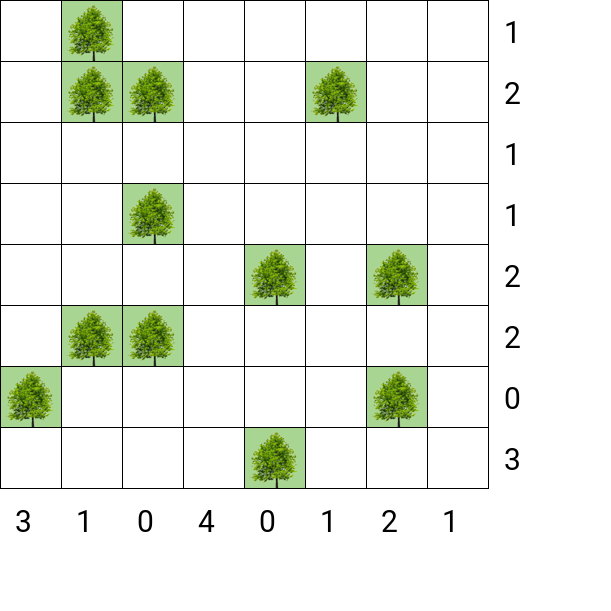

In [19]:
matrix,row,col = LoadStoredPuzzle("Puzzles/puzzle1.npz")
puzzle = TentsAndTrees(matrix,row,col)
player = Player(puzzle)
player.knowledge = LPQuery(
    player.make_emptygreen_rule() +
    player.make_unique_rule() +
    player.make_emptyrowcol_rule() +
    player.make_only_adjacent_tent_rule() +
    player.make_emptygreen_adjacent_to_tent_rule() +
    player.make_fill_remaining_tents_equal_rule() +
    player.make_fillgreen_filledtents_row_rule()
)
player.InitializeAtoms()

puzzle.displayState()

Solucionado!
Wall time: 1min 27s


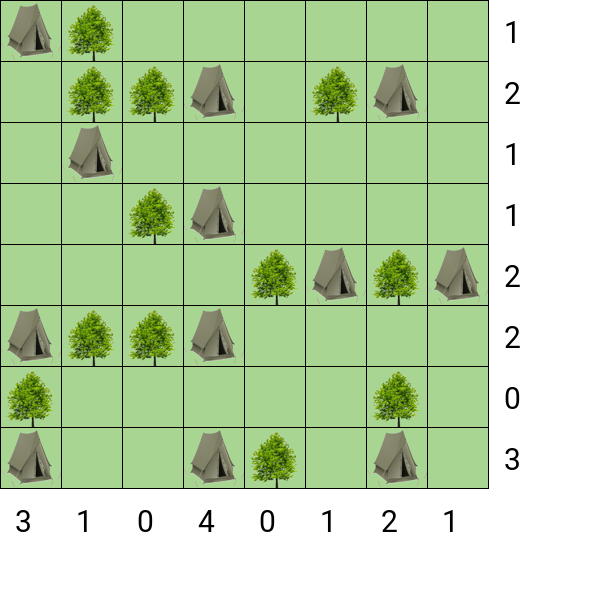

In [20]:
%%time
programa(player)
puzzle.displayState()

### Puzzle 6x6

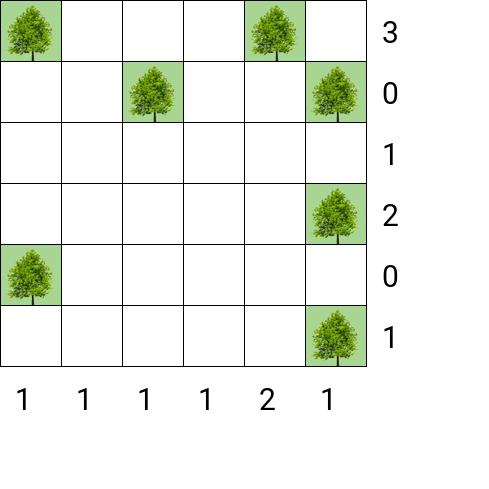

In [21]:
matrix,row,col = LoadStoredPuzzle("Puzzles/puzzle3.npz")
puzzle = TentsAndTrees(matrix,row,col)
player = Player(puzzle)
player.knowledge = LPQuery(
    player.make_emptygreen_rule() +
    player.make_unique_rule() +
    player.make_emptyrowcol_rule() +
    player.make_only_adjacent_tent_rule() +
    player.make_emptygreen_adjacent_to_tent_rule() +
    player.make_fill_remaining_tents_equal_rule() +
    player.make_fillgreen_filledtents_row_rule()
)
player.InitializeAtoms()
puzzle.displayState()

Solucionado!
Wall time: 3.9 s


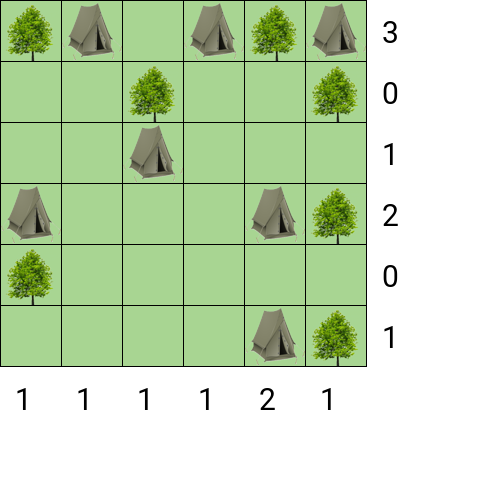

In [22]:
%%time
programa(player)
puzzle.displayState()

### Puzzle 4x4

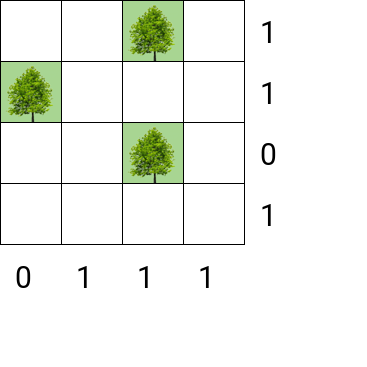

In [23]:
matrix,row,col = LoadStoredPuzzle("Puzzles/puzzle4.npz")
puzzle = TentsAndTrees(matrix,row,col)
player = Player(puzzle)
player.knowledge = LPQuery(
    player.make_emptygreen_rule() +
    player.make_unique_rule() +
    player.make_emptyrowcol_rule() +
    player.make_only_adjacent_tent_rule() +
    player.make_emptygreen_adjacent_to_tent_rule() +
    player.make_fill_remaining_tents_equal_rule() +
    player.make_fillgreen_filledtents_row_rule()
)
player.InitializeAtoms()
puzzle.displayState()

Solucionado!
Wall time: 103 ms


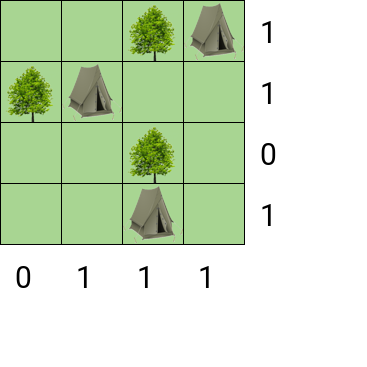

In [24]:
%%time
programa(player)
puzzle.displayState()

### Puzzle 5x5

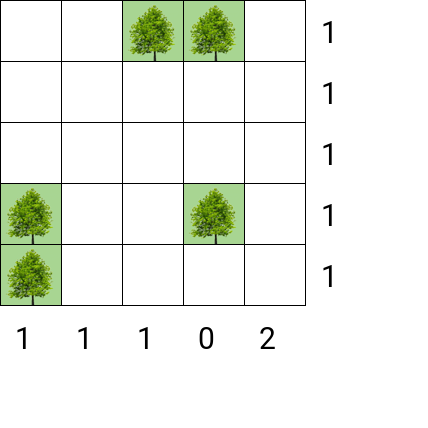

In [25]:
matrix,row,col = LoadStoredPuzzle("Puzzles/puzzle5.npz")
puzzle = TentsAndTrees(matrix,row,col)
player = Player(puzzle)
player.knowledge = LPQuery(
    player.make_emptygreen_rule() +
    player.make_unique_rule() +
    player.make_emptyrowcol_rule() +
    player.make_only_adjacent_tent_rule() +
    player.make_emptygreen_adjacent_to_tent_rule() +
    player.make_fill_remaining_tents_equal_rule() +
    player.make_fillgreen_filledtents_row_rule()
)
player.InitializeAtoms()
puzzle.displayState()

Solucionado!
Wall time: 564 ms


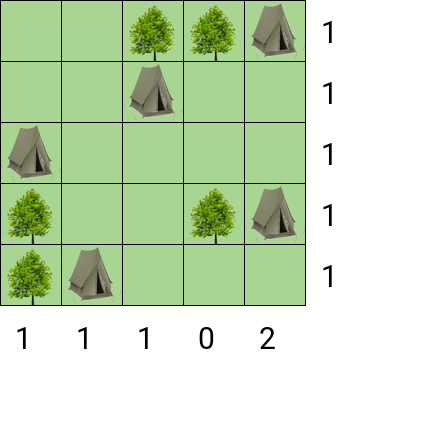

In [26]:
%%time
programa(player)
puzzle.displayState()

Como podemos ver el agente es capaz de solucionar una variedad de puzzles, incluso aquellos de complejidad y tamaño de 8x8. Por lo cual se destaca el agente y cumple el objetivo propuesto.

Sin embargo cabe destacar que al llevar el problemas a dimensiones incluso mayores (uno de 15x15) por ejemplo, el agente no es capaz de solucionarlo en un tiempo óptimo.
Además, el agente tiene unas reglas límitas deducidas de este mundo, que se podrían mejorar incluyendo aún más reglas.
Por lo cual la mayoría de los puzzles el agente va ser posible solucionar, pero es posible que quede atascado en algunos de mayor *dificultad*. A pesar de esto se logro el objetivo de construir un agente basado en lógica proposicional que solucione el problema de manera satisfactoria.